In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from numpy.random import RandomState

_PRNG = RandomState(0)

In [2]:
# Read in the Yelp user dataset, check if a preprocessed dataset exists
_FILE_ORIGINAL_DATASET = "yelp_academic_dataset_user.json"
_FILE_PROCESSED_DATASET = "yelp_academic_dataset_user_processed.csv"

if not Path(_FILE_PROCESSED_DATASET).is_file():
    print("Processed file not found, performing data preprocessing...")
    
    df = pd.read_json(_FILE_ORIGINAL_DATASET, lines=True)
    df = df.drop(columns=["yelping_since", "name", "user_id"])
    
    # Converting friends and elite into integers
    df["friends"] = df["friends"].apply(lambda x: len(x.split(",")) - 1)
    df["elite"] = df["elite"].apply(lambda x: len(x.split(",")) - 1)
    
    df.to_csv(_FILE_PROCESSED_DATASET, index=False)
else:
    print("Processed file found, loading processed file...")
    df = pd.read_csv(_FILE_PROCESSED_DATASET)

print("Number of users:", len(df))

Processed file found, loading processed file...
Number of users: 1518169


In [3]:
df_elite = df[df["elite"] > 0]
df_not_elite = df[df["elite"] == 0]

print("Total elite:", len(df_elite))
print("Total not elite:", len(df_not_elite))
print("Percentage of elite users: {:.05}%".format(len(df_elite) / len(df_not_elite) * 100))

Total elite: 55938
Total not elite: 1462231
Percentage of elite users: 3.8255%


In [4]:
# Take a random subsample, computation constraint, SVMs have poor scalability
SUBSAMPLE_AMOUNT = 12500

df_elite = df_elite.sample(n=SUBSAMPLE_AMOUNT, replace=False, random_state=_PRNG)
df_not_elite = df_not_elite.sample(n=SUBSAMPLE_AMOUNT, replace=False, random_state=_PRNG)

df_elite = df_elite.drop(columns=["elite"])
df_not_elite = df_not_elite.drop(columns=["elite"])
print("Subsample elite:", len(df_elite))
print("Subsample not elite:", len(df_not_elite))

Subsample elite: 12500
Subsample not elite: 12500


In [5]:
df_elite.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,friends,funny,review_count,useful
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000
mean,3.856266,75.190720,3.986320,75.190720,56.124400,1.643120,6.280080,29.706560,27.387680,69.964240,4.318400,27.471440,444.654640,25.855520,251.763600,300.203840,249.410960,557.358080
std,0.317327,385.099095,24.477307,385.099095,442.706063,10.636767,29.406216,131.053161,400.119456,359.157271,34.345995,139.925486,3736.620115,63.996614,470.215546,2439.409612,275.850836,3572.268288
min,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.650000,4.000000,0.000000,4.000000,2.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,2.000000,5.000000,54.000000,3.000000,102.000000,14.000000
50%,3.855000,11.000000,0.000000,11.000000,6.000000,0.000000,2.000000,6.000000,2.000000,9.000000,0.000000,6.000000,13.000000,11.000000,128.000000,15.000000,168.000000,52.000000
75%,4.070000,33.000000,1.000000,33.000000,20.000000,0.000000,5.000000,17.000000,7.000000,27.000000,2.000000,16.000000,75.250000,25.000000,280.000000,69.000000,298.000000,192.000000
max,5.000000,18664.000000,1160.000000,18664.000000,33534.000000,508.000000,1876.000000,7280.000000,37415.000000,12411.000000,2411.000000,7972.000000,195416.000000,2311.000000,12197.000000,105547.000000,7755.000000,188759.000000


In [6]:
df_not_elite.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,friends,funny,review_count,useful
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.00000,12500.000000,12500.000000
mean,3.729072,0.307680,0.022880,0.307680,0.175440,0.005200,0.077360,0.296560,0.091600,0.409920,0.020000,0.138560,3.499600,0.476560,34.009520,3.76216,13.759520,7.377920
std,1.148749,2.724821,0.230393,2.724821,1.747348,0.117533,0.423544,1.450455,1.365869,2.582561,0.181336,0.852607,151.311291,2.018518,86.916258,148.57169,33.000051,76.843755
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,5.000000,0.000000
75%,4.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.00000,13.000000,2.000000
max,5.000000,152.000000,10.000000,152.000000,97.000000,8.000000,9.000000,59.000000,126.000000,87.000000,7.000000,34.000000,16398.000000,70.000000,2257.000000,16096.00000,1351.000000,5688.000000


In [7]:
# Combine subsamples
df_subsample_X = pd.concat([df_elite, df_not_elite], ignore_index=True, copy=True)
df_subsample_X = df_subsample_X.astype(float)
df_subsample_Y = [1] * len(df_elite) + [0] * len(df_not_elite)

assert len(df_subsample_X) == len(df_subsample_Y), "Err: Dataset and labels must be the same size"

In [8]:
# Most libraries recommend a hard normalization, mapping the min and max values of a given dimension to [0,1]
# However, a soft normalization is also feasible using StandardScaler
# https://neerajkumar.org/writings/svm/
# https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

# from sklearn.preprocessing import MinMaxScaler
# scalar = MinMaxScaler(feature_range=(0, 1))

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

df_subsample_scaled_X = scalar.fit_transform(df_subsample_X)

In [9]:
# Create 80/20 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_subsample_scaled_X, df_subsample_Y, test_size=0.2, stratify=df_subsample_Y, random_state=_PRNG)
print("Training set size:", len(X_train))
print("Training label size:", len(Y_train))
print("Test set size:", len(X_test))
print("Test label size:", len(Y_test))

Training set size: 20000
Training label size: 20000
Test set size: 5000
Test label size: 5000


In [10]:
# Use cross-validation to find the best C, using F1-score
from collections import namedtuple
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Result_C = namedtuple("Result_C", ["C", "score_mean", "scores"])

POSSIBLE_C = [2 ** power for power in range(-5, 9)]

cross_val_results = []
for test_C in POSSIBLE_C:
    svm = SVC(C=test_C, kernel="linear", cache_size=4000, max_iter=-1, random_state=_PRNG)
    cv_scores = cross_val_score(svm, X_train, Y_train, cv=5, scoring='f1', n_jobs=-1)
    cross_val_results.append(Result_C(test_C, cv_scores.mean(), cv_scores))
    print(cross_val_results[-1])

Result_C(C=0.03125, score_mean=0.9540048057638643, scores=array([0.95369212, 0.95288221, 0.95247624, 0.95976006, 0.95121341]))
Result_C(C=0.0625, score_mean=0.9570063096858561, scores=array([0.95684709, 0.95456815, 0.95496392, 0.9626494 , 0.95600298]))
Result_C(C=0.125, score_mean=0.9583361765566509, scores=array([0.95814649, 0.95587135, 0.9565649 , 0.96373572, 0.95736242]))
Result_C(C=0.25, score_mean=0.9598257242819482, scores=array([0.9604576 , 0.95797065, 0.95708261, 0.96448969, 0.95912807]))
Result_C(C=0.5, score_mean=0.9607897722286751, scores=array([0.9622454 , 0.95803328, 0.95755771, 0.96450732, 0.96160515]))
Result_C(C=1, score_mean=0.9618014212961699, scores=array([0.96399305, 0.95844737, 0.9582505 , 0.96550012, 0.96281606]))
Result_C(C=2, score_mean=0.962041295097477, scores=array([0.96425025, 0.95868591, 0.95876801, 0.96546584, 0.96303647]))
Result_C(C=4, score_mean=0.9622289425817311, scores=array([0.96498634, 0.95888363, 0.96005954, 0.96520875, 0.96200646]))
Result_C(C=8,

In [11]:
best_cv = max(cross_val_results, key=lambda x: x.score_mean)
best_cv

Result_C(C=16, score_mean=0.9627032506853517, scores=array([0.96567164, 0.95934148, 0.96075509, 0.96445439, 0.96329365]))

In [12]:
# Use the best C found from cross-validation
svm = SVC(C=best_cv.C, kernel="linear", cache_size=4000, max_iter=-1, verbose=False, random_state=_PRNG)
svm.fit(X_train, Y_train)

SVC(C=16, cache_size=4000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False,
  random_state=<mtrand.RandomState object at 0x000002096F9B9A20>,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
print("We want to see '0' here...:", svm.fit_status_)

We want to see '0' here...: 0


In [14]:
svm.score(X_test, Y_test)

0.9604

In [15]:
# Baseline comparison, intuition tells us good photos or good writers should be elite
# Take the top quantile
_X_train = pd.DataFrame(scalar.inverse_transform(X_train), columns=df_elite.columns)
_X_test = pd.DataFrame(scalar.inverse_transform(X_test), columns=df_elite.columns)

quantile = .5

train_top_quantile_writer = _X_train["compliment_writer"].quantile(quantile)
train_top_quantile_photo = _X_train["compliment_photos"].quantile(quantile)

Y_baseline_pred = [1 if row["compliment_writer"] > train_top_quantile_writer or row["compliment_photos"] > train_top_quantile_photo else 0 for _, row in _X_test.iterrows()]

correct_pred_count = sum(int(pred == truth) for pred, truth in zip(Y_baseline_pred, Y_test))
print("Baseline Accuracy (Quantile={}): {}".format(quantile, correct_pred_count/len(Y_baseline_pred)))

Baseline Accuracy (Quantile=0.5): 0.9232


Best baseline result: 0.9232


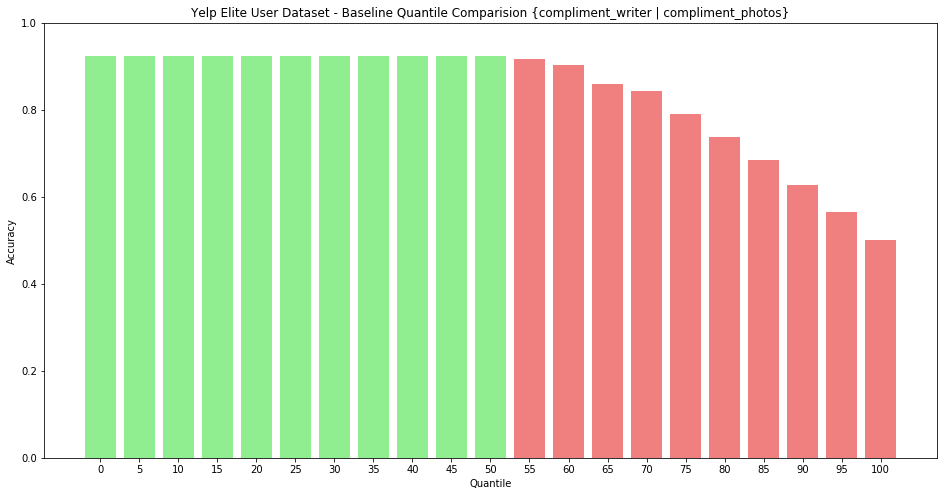

In [16]:
# Baseline comparision, exhaustive search of quantiles
baseline_results = []

for quantile in range(0, 101, 5):
    quantile = quantile / 100
    train_top_mean_writer = _X_train["compliment_writer"].quantile(quantile)
    train_top_mean_photo = _X_train["compliment_photos"].quantile(quantile)

    Y_baseline_pred = [1 if row["compliment_writer"] > train_top_mean_writer or row["compliment_photos"] > train_top_mean_photo else 0 for _, row in _X_test.iterrows()]

    correct_pred_count = sum(int(pred == truth) for pred, truth in zip(Y_baseline_pred, Y_test))
    baseline_results.append(correct_pred_count / len(Y_baseline_pred))

best_baseline_result = max(baseline_results)
print("Best baseline result:", best_baseline_result)

colors = ["lightgreen" if res == best_baseline_result else "lightcoral" for res in baseline_results]
    
plt.figure(figsize=(16, 8))
plt.bar(list(range(0, 101, 5)), baseline_results, width=4, color=colors)
plt.xticks(list(range(0, 101, 5)))
plt.ylim(0, 1)
plt.xlabel("Quantile")
plt.ylabel("Accuracy")
plt.title("Yelp Elite User Dataset - Baseline Quantile Comparision {compliment_writer | compliment_photos}")
plt.savefig("baseline_quantile_comparision.png", bbox_inches='tight')
plt.show()

In [17]:
svm.coef_

array([[ 0.22013733,  8.10331166, -3.43259983,  8.10331166,  3.37573929,
        -1.79750591,  2.74736092,  1.53570403,  3.97331007, -3.04427986,
        -0.1227823 , 21.74572014, -0.53363051,  3.02077841,  0.11883327,
        -2.60159627,  5.07111387, -0.60823155]])

In [18]:
df_elite.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'fans', 'friends', 'funny', 'review_count', 'useful'],
      dtype='object')

In [19]:
for col_name, value in zip(df_elite.columns, svm.coef_.ravel()):
    print("{:20s} : {:.4f}".format(col_name, value))

average_stars        : 0.2201
compliment_cool      : 8.1033
compliment_cute      : -3.4326
compliment_funny     : 8.1033
compliment_hot       : 3.3757
compliment_list      : -1.7975
compliment_more      : 2.7474
compliment_note      : 1.5357
compliment_photos    : 3.9733
compliment_plain     : -3.0443
compliment_profile   : -0.1228
compliment_writer    : 21.7457
cool                 : -0.5336
fans                 : 3.0208
friends              : 0.1188
funny                : -2.6016
review_count         : 5.0711
useful               : -0.6082


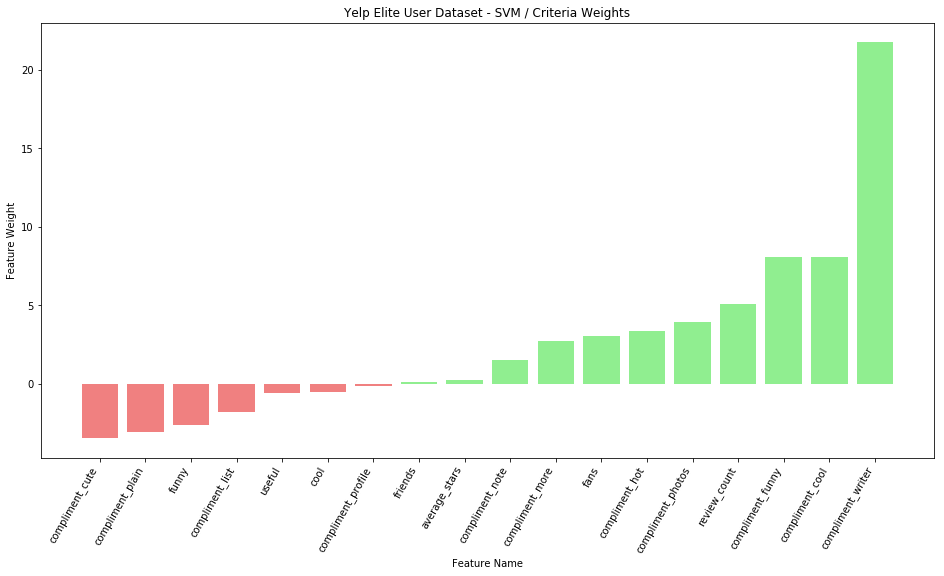

In [20]:
# Plot SVM feature weights
coef = svm.coef_.ravel()
coef_sorted = np.argsort(coef)

col = list(df_elite.columns)
colors = ["lightcoral" if feature_weight < 0 else "lightgreen" for feature_weight in coef[coef_sorted]]

plt.figure(figsize=(16, 8))
plt.bar(list(range(len(coef))), coef[coef_sorted], color=colors)
plt.xticks(np.arange(0, len(coef)), [col[idx] for idx in coef_sorted], rotation=60, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Weight")
plt.title("Yelp Elite User Dataset - SVM / Criteria Weights")
plt.savefig("feature_weights.png", bbox_inches='tight')
plt.show()

In [21]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

Y_predict = svm.predict(X_test)
print("Y_predict:", len(Y_predict))

cnf_matrix = confusion_matrix(Y_test, Y_predict)

tn, fp, fn, tp = cnf_matrix.ravel()

print("tp: {}\ntn: {}\nfp: {}\nfn: {}".format(tp, tn, fp, fn))

Y_predict: 5000
tp: 2407
tn: 2395
fp: 105
fn: 93


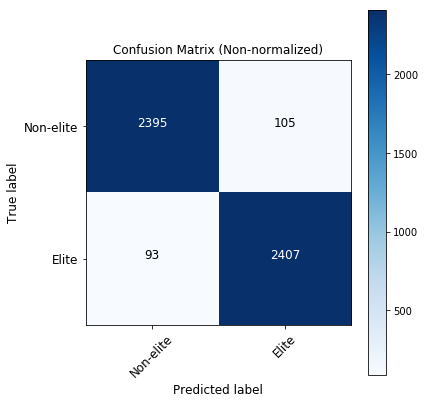

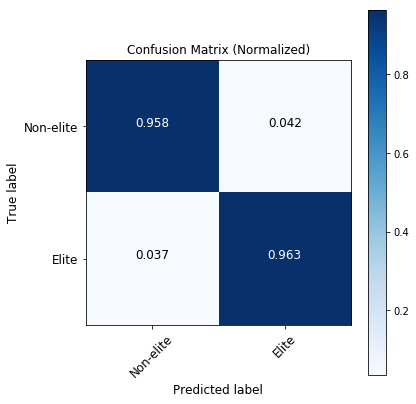

In [22]:
# Plot confusion matrix
# Code from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix'):
    plt.figure(figsize=(6, 6))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)

    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.tight_layout()
    if normalize:
        plt.savefig("confusion_matrix_normalized.png", bbox_inches='tight')
    else:
        plt.savefig("confusion_matrix_non-normalized.png", bbox_inches='tight')
    plt.show()

    
np.set_printoptions(precision=3)
class_names = ["Non-elite", "Elite"] 

# Compute confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix (Non-normalized)')

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Confusion Matrix (Normalized)')